# Explore here

# TRATAMIENTO DEL DATAFRAME

In [74]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
df.info()

In [76]:
print ("the total number of colums in the dataset is: ", df.shape)

the total number of colums in the dataset is:  (48895, 16)


In [ ]:
print(df.columns)

In [ ]:
# elimino duplicados --> siempre coger ID o la primera (que acopla mas info)
if df["id"].duplicated().sum() > 0:
	print("there are duplicates in the dataset")
else:
	print("there are no duplicates in the dataset")

In [ ]:
# alternativa para eliminar duplicados 
df.drop("id", axis = 1).duplicated().sum()

In [ ]:
# elimino tres columnas que considero que no aportan info (aunque esto es discrecional dependiendo del analisis que quiera llevar a cabo)
df.drop(["name", "host_name", "reviews_per_month"], axis = 1, inplace = True)
df.head()

In [ ]:
print (df.info ())

In [ ]:
print(df.columns)

# ANALISIS DE VARIABLES CATEGORICAS

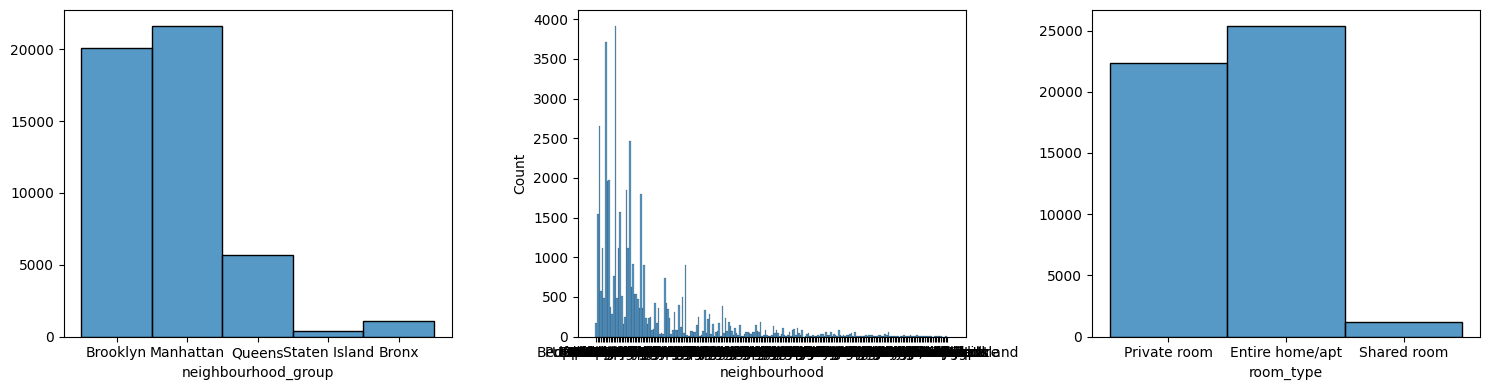

In [ ]:

# ANALISIS DE VARIABLES CATEGORICAS
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize =(15,4))

# Crear un histograma múltiple solo para las variables categóricas
if "neighbourhood_group" in df.columns:
    sns.histplot(ax = axis[0], data = df, x = "neighbourhood_group").set(ylabel = None)
if "neighbourhood" in df.columns:
    sns.histplot(ax = axis[1], data = df, x = "neighbourhood")
if "room_type" in df.columns:
    sns.histplot(ax = axis[2], data = df, x = "room_type").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

Resumen del Análisis del Gráfico
neighbourhood_group:

Muestra la cantidad de registros por grupo de vecindarios.
Identifica los grupos más y menos comunes.
neighbourhood:

Muestra la cantidad de registros por vecindario específico.
Identifica los vecindarios con más y menos registros.
room_type:

Muestra la cantidad de registros por tipo de habitación.
Revela las preferencias de los usuarios en cuanto al tipo de alojamiento.
Conclusiones
Distribución de Vecindarios:

Identifica los vecindarios y grupos de vecindarios más y menos populares.
Preferencias de Tipo de Habitación:

Muestra qué tipo de habitación es más demandada.

In [105]:
print(df.columns)

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# ANALISIS DE VARIABLES NUMERICAS

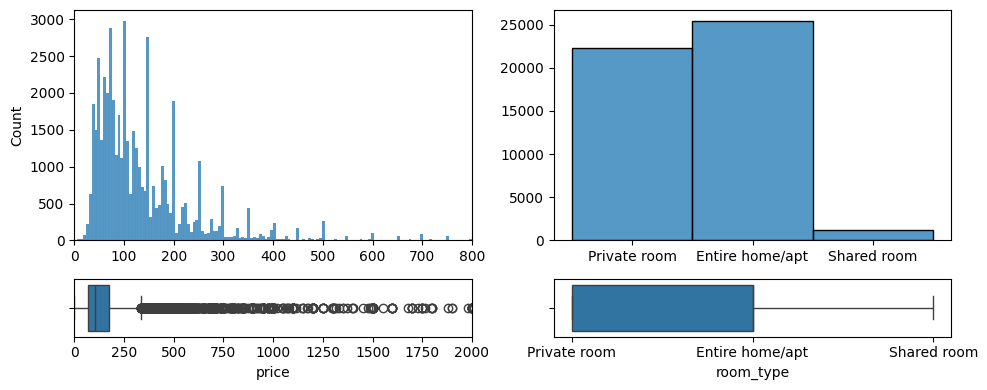

In [111]:
fig, axis = plt.subplots(2, 2, figsize =(10,4) ,gridspec_kw={'height_ratios': [4, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "room_type").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "room_type")

# Ajustar los límites del eje x para los gráficos de la izquierda
axis[0, 0].set_xlim(0, 800)
axis[1, 0].set_xlim(0, 2000)
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

Segun los graficos de arriba, en el de la izq vemos la distribucion de los precios de las habitaciones. la mayor concentracion se encuentra oscilando entre los 0 y 400, algunos son superiores. 
en el grafico de la izquierda vemos que hay mayor concentracion de apartmentos enteros, despues de habitaciones privadas y por ultimo un numero muy reducido en comparacion de habitaciones compartidas.

In [112]:
print (df.columns)

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


# ANALISIS DE VARIABLES MULTIVARIANTE

VARIABLES NUMERICAS - NUMERICAS

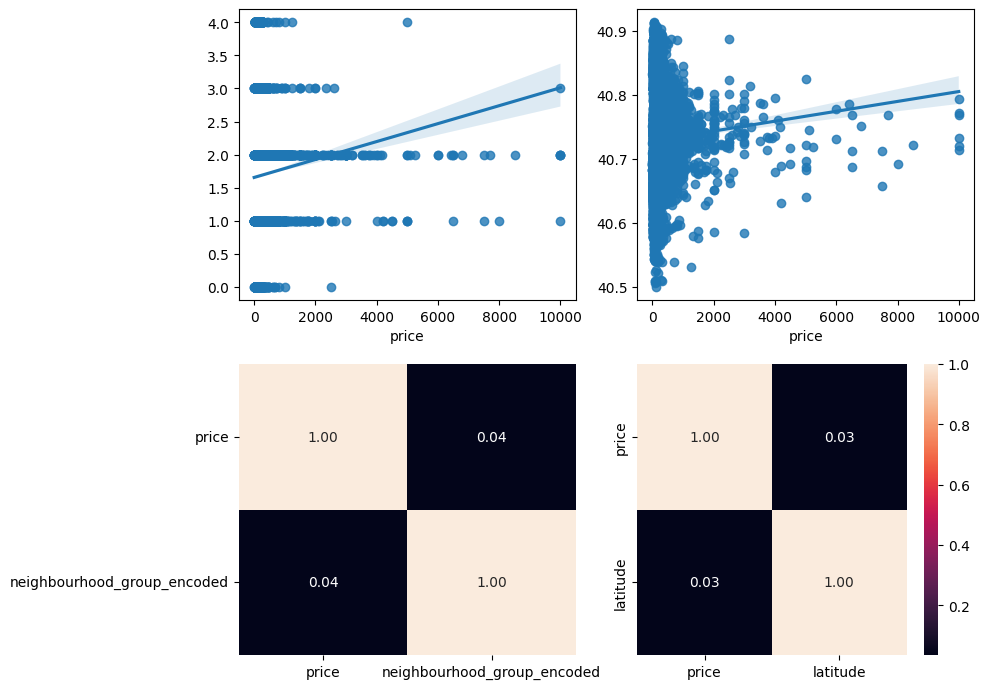

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convertir neighbourhood_group a valores numéricos
le = LabelEncoder()
df['neighbourhood_group_encoded'] = le.fit_transform(df['neighbourhood_group'])

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "price", y = "neighbourhood_group_encoded").set(ylabel=None)
sns.heatmap(df[["price", "neighbourhood_group_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x ="price", y = "latitude").set(ylabel=None)
sns.heatmap(df[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Histograma de neighbourhood_group:

Este gráfico muestra la distribución de los registros en función de los diferentes grupos de vecindarios.
Podemos observar cuál es el grupo de vecindarios más común y cuál es el menos común en el conjunto de datos.
Histograma de neighbourhood:

Este gráfico muestra la distribución de los registros en función de los diferentes vecindarios.
Nos permite identificar los vecindarios con más y menos registros en el conjunto de datos.
Histograma de room_type:

Este gráfico muestra la distribución de los registros en función de los diferentes tipos de habitaciones.
Podemos observar cuál es el tipo de habitación más común y cuál es el menos común en el conjunto de datos.
Generación y Análisis de la Matriz de Correlación
Para generar la matriz de correlación, utilizamos el método corr() de pandas. Aquí tienes el código para generar y visualizar la matriz de correlación:

VARIABLES CATEGORICO - CATEGORICO

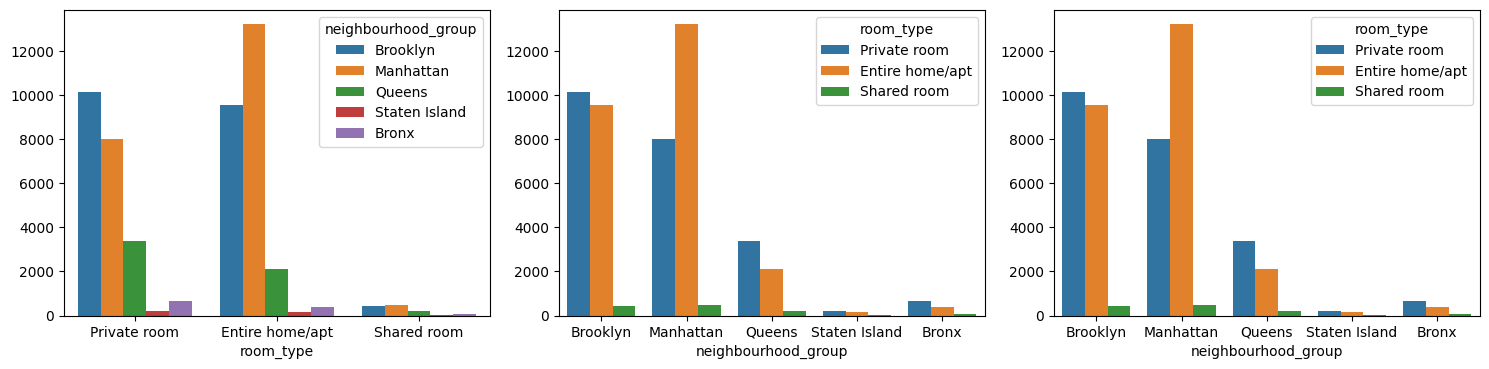

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)

# Crear una lista de las combinaciones de columnas que quieres graficar
combinaciones = [
    ("room_type", "neighbourhood_group"),
    ("neighbourhood_group", "room_type"),
    ("neighbourhood_group", "room_type")
]

# Filtrar combinaciones válidas
combinaciones_validas = [
    (x, hue) for x, hue in combinaciones
    if x in df.columns and hue in df.columns and not df[x].isnull().all() and not df[hue].isnull().all()
]

# Crear subplots dinámicamente según el número de combinaciones válidas
fig, axis = plt.subplots(len(combinaciones_validas) // 3 + 1, 3, figsize=(15, 7))

# Aplanar la matriz de ejes para facilitar el acceso
axis = axis.flatten()

# Graficar solo las combinaciones válidas
for i, (x, hue) in enumerate(combinaciones_validas):
    sns.countplot(ax=axis[i], data=df, x=x, hue=hue).set(ylabel=None)

# Eliminar subplots vacíos
for j in range(i + 1, len(axis)):
    fig.delaxes(axis[j])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

1. Distribución de Tipos de Habitaciones por Grupo de Vecindarios: Muestra qué tipos de habitaciones son más comunes en cada grupo de vecindarios.

2. Distribución de Grupos de Vecindarios por Tipo de Habitación: Muestra qué grupos de vecindarios son más comunes para cada tipo de habitación.

Conclusiones:

a) Preferencias de Alojamiento: Algunos grupos de vecindarios tienen más habitaciones completas, otros más habitaciones privadas.

b) Popularidad de Vecindarios: Revela qué vecindarios son más populares para cada tipo de habitación.

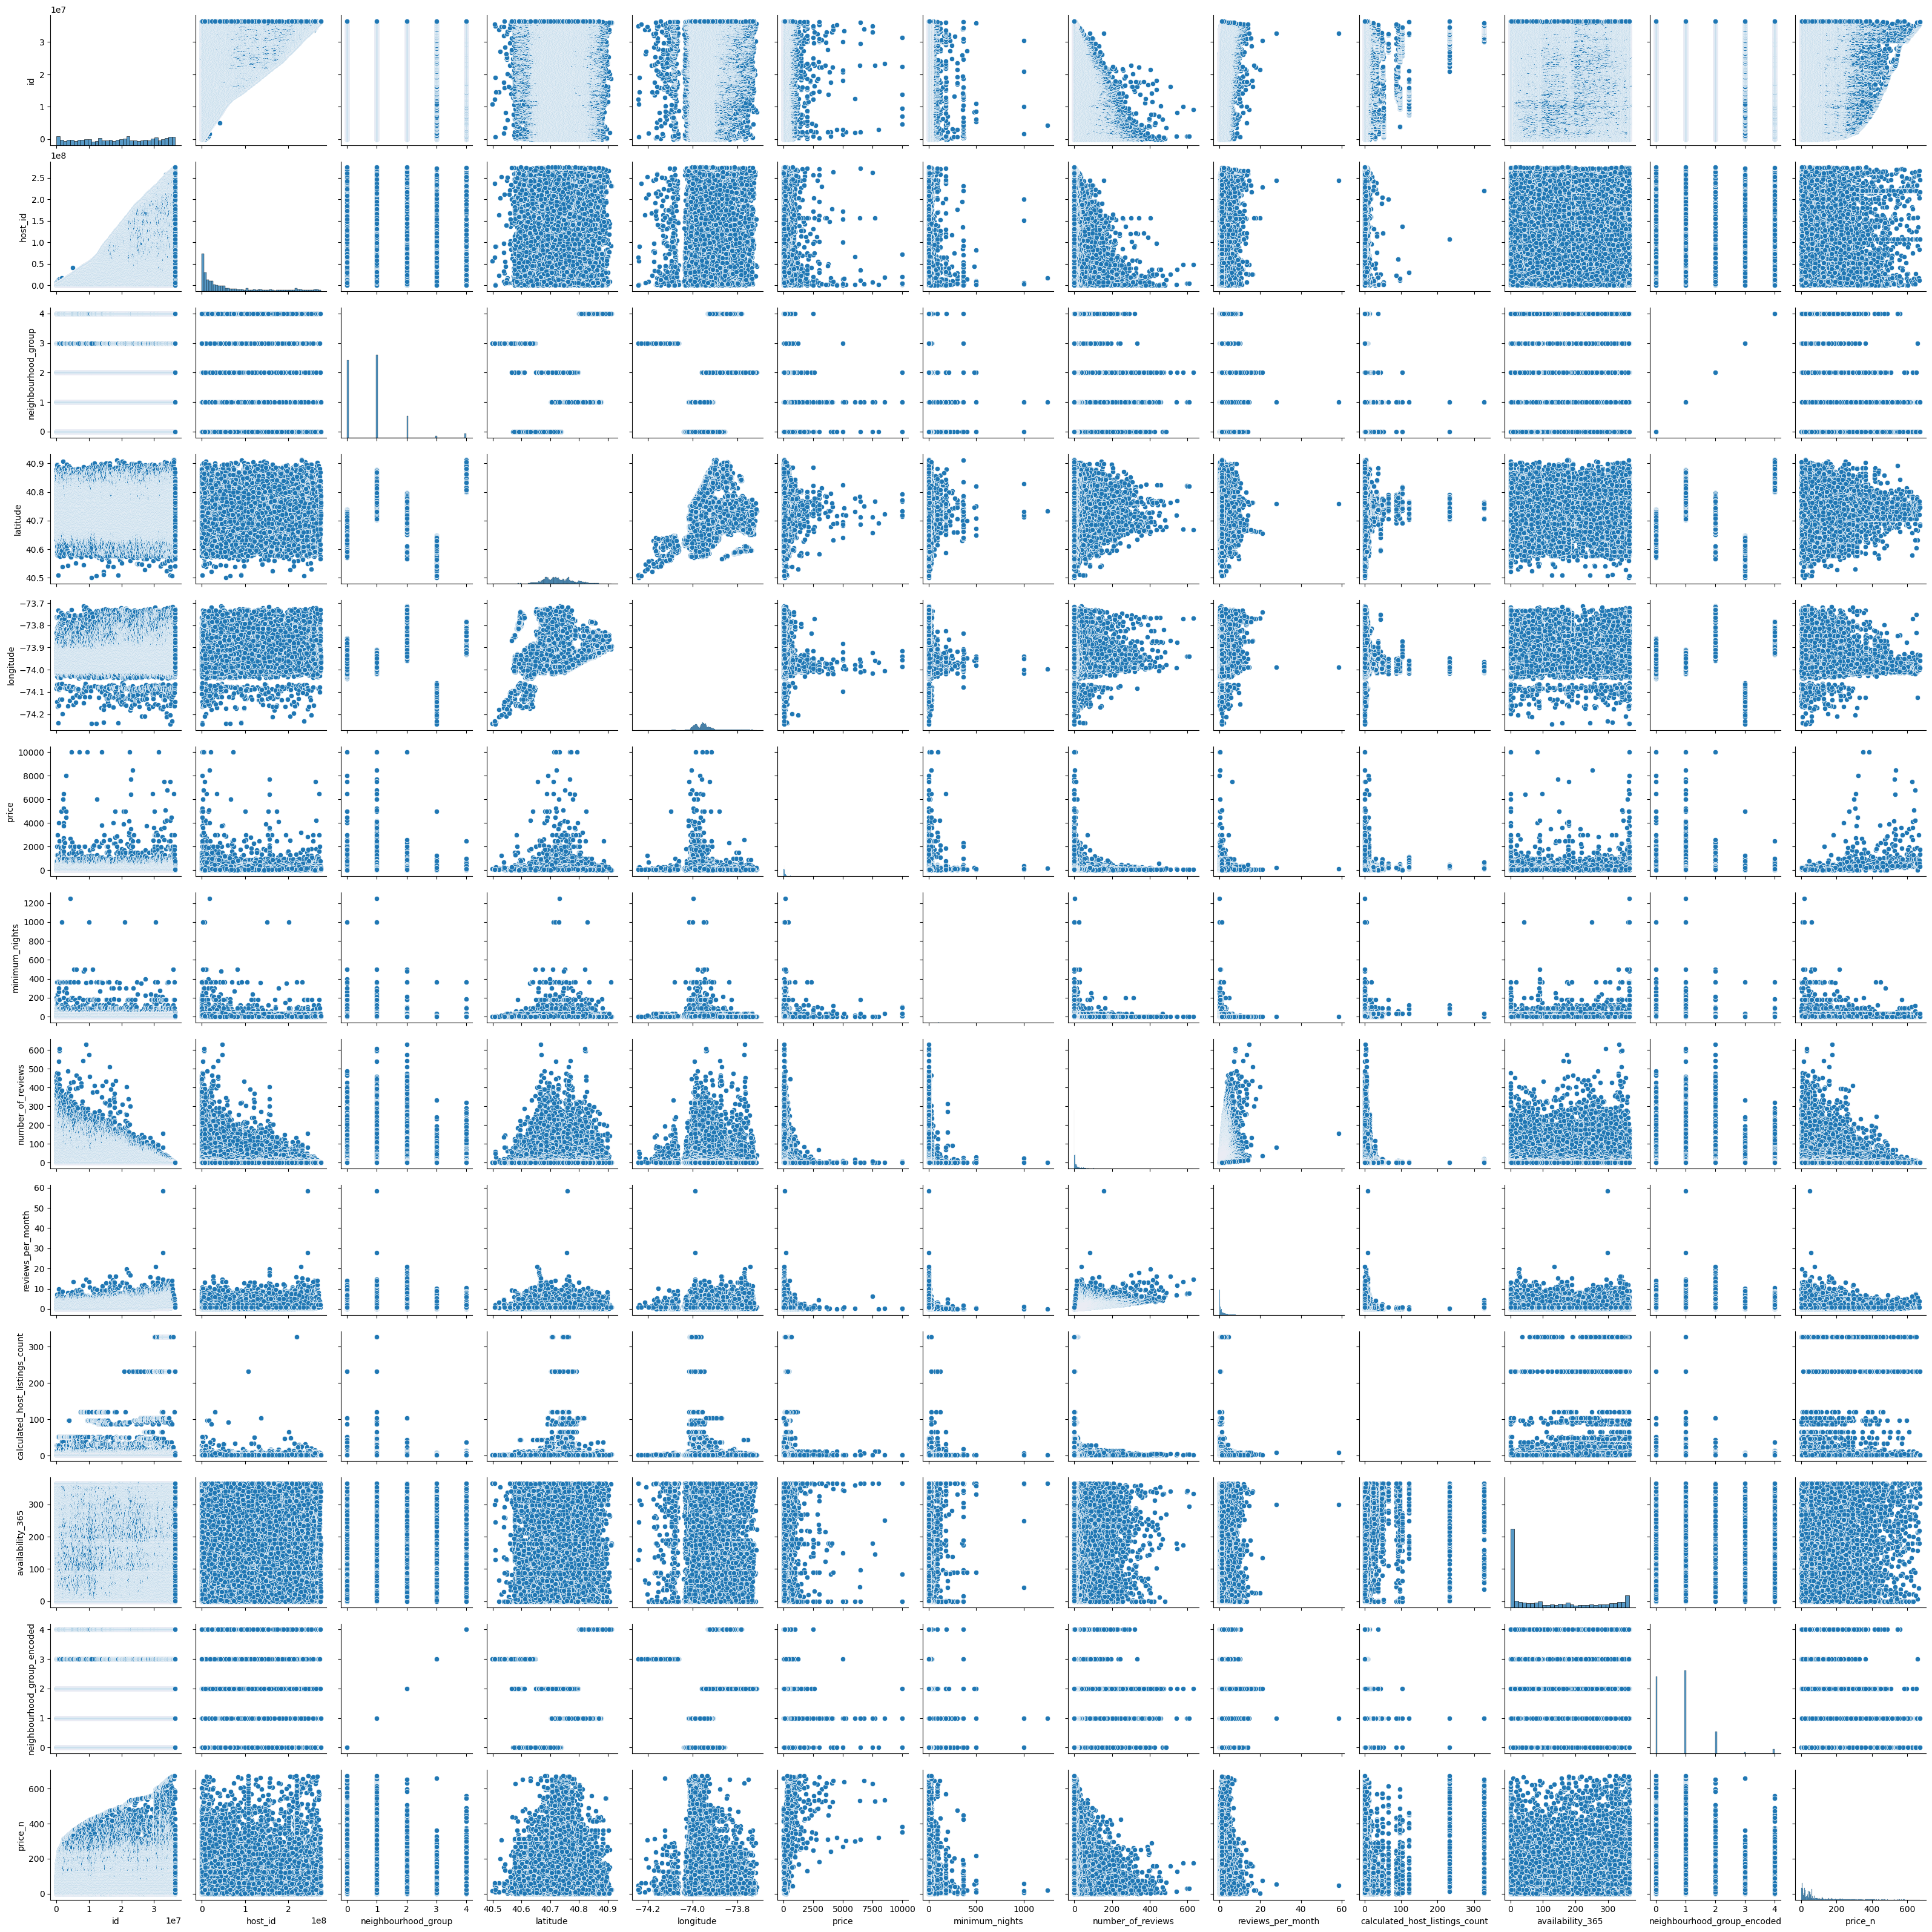

In [31]:
sns.pairplot(data = df)

# COMBINACIONES DE VARIAS PREDICTORAS

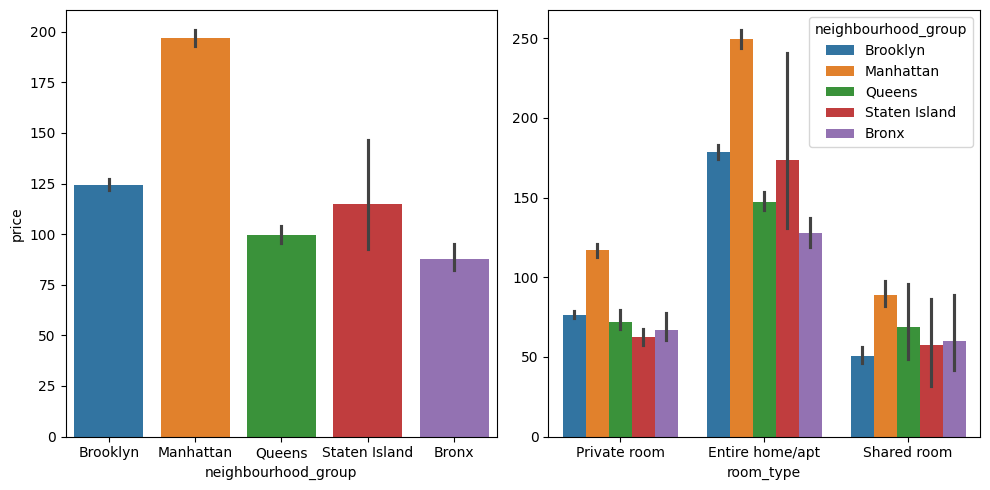

In [ ]:
import seaborn as sns    
import matplotlib.pyplot as plt    

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "neighbourhood_group", y = "price", hue = "neighbourhood_group")
sns.barplot(ax = axis[1], data = df, x = "room_type", y = "price", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()

plt.show()

Gráfico 1: Precio por neighbourhood_group:

Muestra el precio promedio de las propiedades en cada grupo de vecindarios.
Conclusión: Revela las diferencias de precios entre los grupos de vecindarios.
Gráfico 2: Precio por room_type:

Muestra el precio promedio de las propiedades según el tipo de habitación, desglosado por grupo de vecindarios.
Conclusión: Muestra cómo varían los precios según el tipo de habitación y el grupo de vecindarios.

# ANALISIS DE CORRELACIONES

In [ ]:
import pandas as pd
import json

# Factorizar la columna 'neighbourhood_group'
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]

# Crear las reglas de transformación para la columna 'room_type'
transformation = {row["room_type"]: row["neighbourhood_group"] for _, row in df[["room_type", "neighbourhood_group"]].drop_duplicates().iterrows()}

# Guardar las reglas de transformación en un archivo JSON
with open("transformation.json", "w") as f:
    json.dump(transformation, f)

In [ ]:
transformation

{'Private room': 4, 'Entire home/apt': 3, 'Shared room': 3}

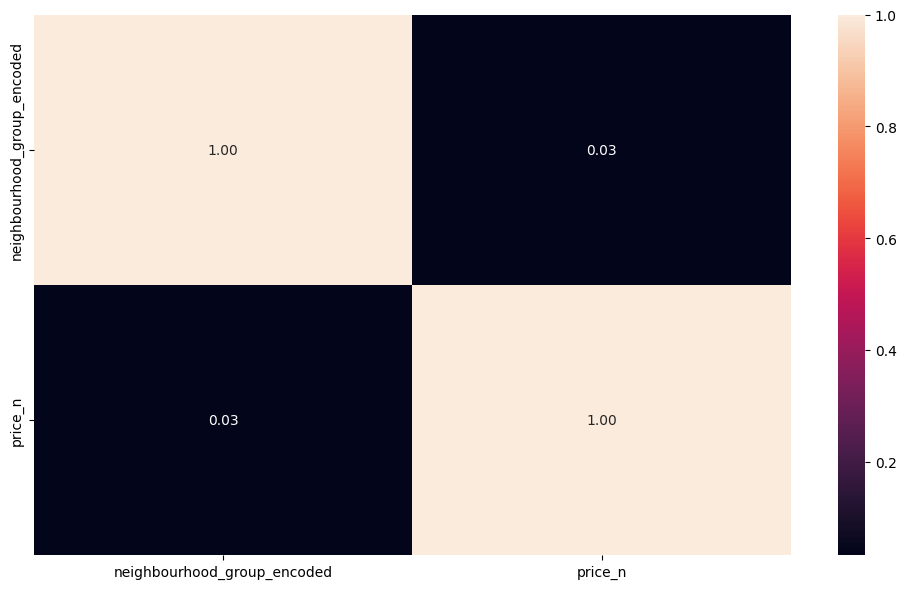

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["neighbourhood_group_encoded"] = pd.factorize(df["neighbourhood_group"])[0]
df["price_n"] = pd.factorize(df["price"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["neighbourhood_group_encoded", "price_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
transformation

{'Private room': 4, 'Entire home/apt': 3, 'Shared room': 3}

In [ ]:
pd.factorize(list(transformation.values())[1:])[0]

/tmp/ipykernel_3234/1104934455.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.factorize(list(transformation.values())[1:])[0]


array([0, 0])

# FINAL 

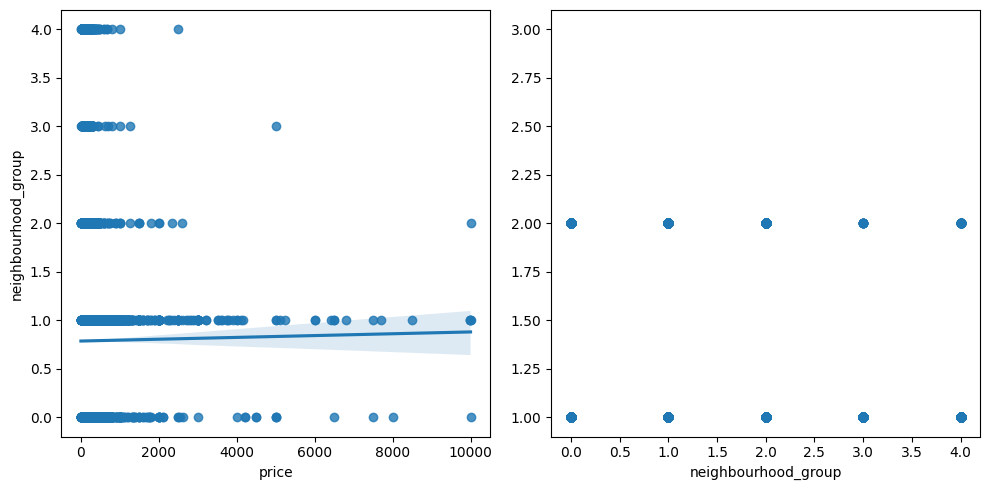

In [34]:
import seaborn as sns     
import matplotlib.pyplot as plt           

# Convert 'room_type' to numerical values
df['room_type_encoded'] = pd.factorize(df['room_type'])[0]

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "price", y = "neighbourhood_group")
sns.regplot(ax = axis[1], data = df, x = "neighbourhood_group", y = "room_type_encoded").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

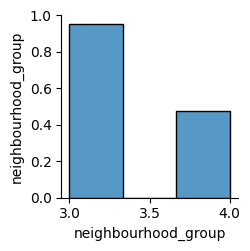

In [35]:
import seaborn as sns   
import matplotlib.pyplot as plt        
import pandas as pd

# Convert the transformation dictionary to a DataFrame
transformation_df = pd.DataFrame(list(transformation.items()), columns=['room_type', 'neighbourhood_group'])

sns.pairplot(data = transformation_df)

# INGENIERÍA DE FUNCIONES

ANÁLISIS DE VALORES ATÍPICOS - OUTLIERS

In [36]:
df.describe()

id       host_id  neighbourhood_group      latitude  \
count  4.889500e+04  4.889500e+04         48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07             0.786911     40.728949   
std    1.098311e+07  7.861097e+07             0.844386      0.054530   
min    2.539000e+03  2.438000e+03             0.000000     40.499790   
25%    9.471945e+06  7.822033e+06             0.000000     40.690100   
50%    1.967728e+07  3.079382e+07             1.000000     40.723070   
75%    2.915218e+07  1.074344e+08             1.000000     40.763115   
max    3.648724e+07  2.743213e+08             4.000000     40.913060   

          longitude         price  minimum_nights  number_of_reviews  \
count  48895.000000  48895.000000    48895.000000       48895.000000   
mean     -73.952170    152.720687        7.029962          23.274466   
std        0.046157    240.154170       20.510550          44.550582   
min      -74.244420      0.000000        1.000000           0.000000   
25%      -73.983070     69.000000        1.000000           1.000000   
50%      -73.955680    106.000000        3.000000           5.000000   
75%      -73.936275    175.000000        5.000000          24.000000   
max      -73.712990  10000.000000     1250.000000         629.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       38843.000000                    48895.000000      48895.000000   
mean            1.373221                        7.143982        112.781327   
std             1.680442                       32.952519        131.622289   
min             0.010000                        1.000000          0.000000   
25%             0.190000                        1.000000          0.000000   
50%             0.720000                        1.000000         45.000000   
75%             2.020000                        2.000000        227.000000   
max            58.500000                      327.000000        365.000000   

       neighbourhood_group_encoded      price_n  room_type_encoded  
count                 48895.000000  48895.00000       48895.000000  
mean                      0.786911     72.06786           0.567113  
std                       0.844386     91.33768           0.541249  
min                       0.000000      0.00000           0.000000  
25%                       0.000000     16.00000           0.000000  
50%                       1.000000     42.00000           1.000000  
75%                       1.000000     83.50000           1.000000  
max                       4.000000    673.00000           2.000000

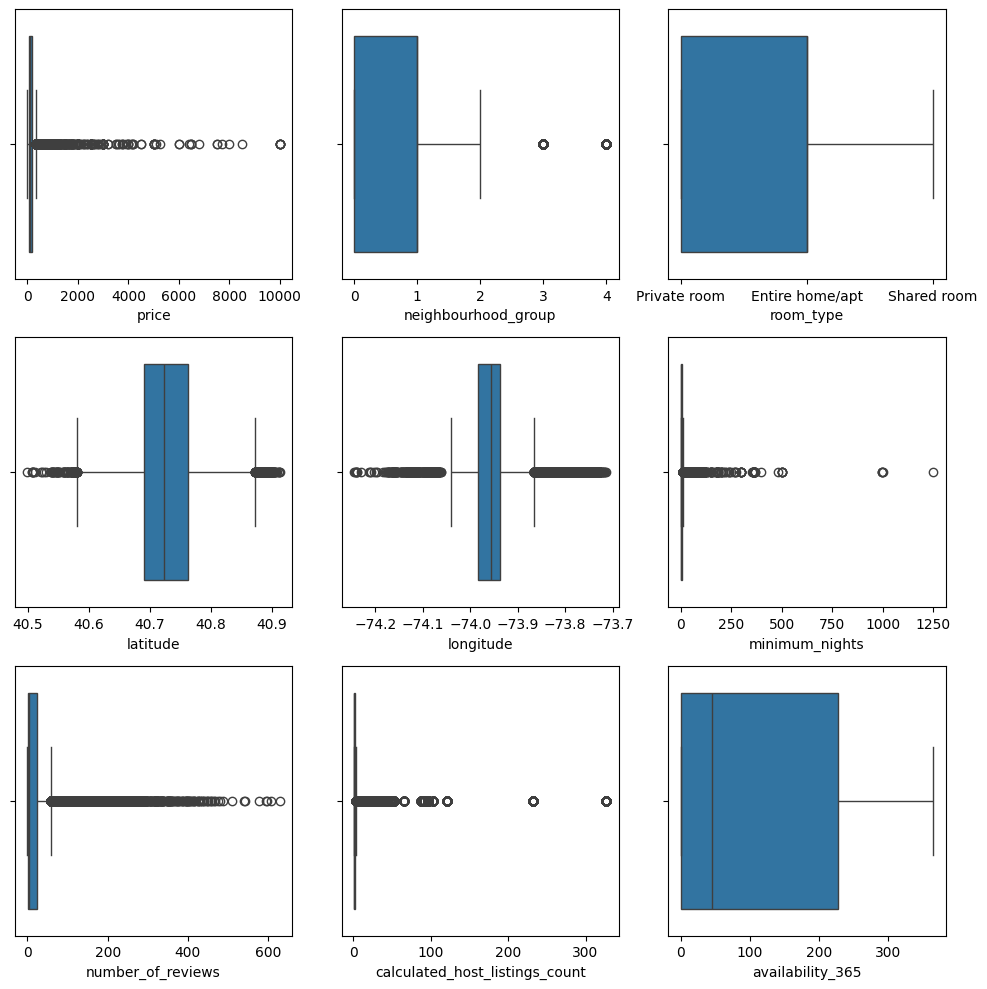

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(ax=axes[0, 0], data=df, x="price")
sns.boxplot(ax=axes[0, 1], data=df, x="neighbourhood_group")
sns.boxplot(ax=axes[0, 2], data=df, x="room_type")
sns.boxplot(ax=axes[1, 0], data=df, x="latitude")
sns.boxplot(ax=axes[1, 1], data=df, x="longitude")
sns.boxplot(ax=axes[1, 2], data=df, x="minimum_nights")
sns.boxplot(ax=axes[2, 0], data=df, x="number_of_reviews")
sns.boxplot(ax=axes[2, 1], data=df, x="calculated_host_listings_count")
sns.boxplot(ax=axes[2, 2], data=df, x="availability_365")

plt.tight_layout()
plt.show()




# DETENCIÓN DE VALORES ATIPICOS VARIABLE PRECIO

In [45]:
price_stats = df["price"].describe ()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [46]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [51]:
# Clean the outliers

df = df[df["price"] > 0]

In [52]:
count_0 = df[df["price"] == 0].shape[0]
count_1 = df[df["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


# DETENCIÓN DE VALORES ATIPICOS VARIABLE MINIMO DE NOCHES

In [56]:
nights_stats = df["minimum_nights"].describe()
nights_stats


count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [58]:

# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [59]:

# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [65]:
# Clean the outliers

df = df[df["minimum_nights"] <= 15]

In [66]:
count_0 = df[df["minimum_nights"] == 0].shape[0]
count_1 = df[df["minimum_nights"] == 1].shape[0]
count_2 = df[df["minimum_nights"] == 2].shape[0]
count_3 = df[df["minimum_nights"] == 3].shape[0]
count_4 = df[df["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


# DETENCIÓN DE VALORES ATIPICOS VARIABLE VARIABLE CALCULATED_HOST_LISTINGS_COUNTS

In [68]:
# Stats for calculated_host_listings_count

hostlist_stats = df["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [69]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [70]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [71]:
# Clean the outliers

df =df[df["calculated_host_listings_count"] > 4]

# ANALISIS DE VALOR FALTANTE

In [72]:
# Count NaN
total_data.isnull().sum().sort_values(ascending = False)

reviews_per_month                 7811
last_review                       7811
host_name                           20
name                                15
id                                   0
host_id                              0
neighbourhood_group                  0
longitude                            0
room_type                            0
neighbourhood                        0
latitude                             0
minimum_nights                       0
price                                0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_encoded          0
price_n                              0
room_type_encoded                    0
dtype: int64

# ESCALADO DE FUNCIONES

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[num_variables])
df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=num_variables)
df_scaled["price"] = df["price"]
df_scaled.head()

# SELECCIÓN DE FUNCIONES

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scaled.drop("price", axis = 1)
y = df_scaled["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)